# Classificação de Flores (Iris Dataset)

In [2]:
# Importando bibliotecas
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Carrega o Dataset Iris
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
class_names = iris.target_names

In [6]:
# Criada dataframe
df_iris = pd.DataFrame(X, columns= feature_names)
df_iris['target'] = y
df_iris['target_names'] = [class_names[i] for i in y]

In [8]:
print(f"Nomes das features: {feature_names}")

Nomes das features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
print(f"Nomes das classes: {class_names}")

Nomes das classes: ['setosa' 'versicolor' 'virginica']


In [11]:
# Primeiras linhas
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
# Estatísticas descritivas
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
# Divisão dos dados em treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [14]:
print(f"Tamanho dos conjuntos de treinamento: X_train={X_train.shape}, y_train={y_train.shape}")

Tamanho dos conjuntos de treinamento: X_train=(105, 4), y_train=(105,)


In [15]:
# Treinar Modelos
# Dicionário para armazenar os resultados de cada modelo
resultados_modelos = {}

# Dicionário para incializar os modelos
algoritmos = {
  'KNN':KNeighborsClassifier(n_neighbors=5),
  'Decision Tree': DecisionTreeClassifier(random_state=42),
  'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

In [16]:
# loop para treinar os modelos
for nome_algoritmo, modelo in algoritmos.items():
  # Treinar o modelo
  modelo.fit(X_train, y_train)

  # Fazer previsões
  y_pred = modelo.predict(X_test)

  # Calcula acurácia
  acuracia = accuracy_score(y_test, y_pred)

  # Relatório de classificação
  relatorio_classificacao = classification_report(y_test, y_pred, target_names=class_names)

  #Matriz de confusão
  matriz_confusao = confusion_matrix(y_test, y_pred)

  #Armazena resultados
  resultados_modelos[nome_algoritmo] = {
    'acuracia': acuracia,
    'relatoria_classificacao': relatorio_classificacao,
    'matriz_confusao': matriz_confusao
  }

  print(f"Acurácia ({nome_algoritmo}): {acuracia:.4f}")
  print(f"Relatório de Classificação ({nome_algoritmo}: \n{relatorio_classificacao})")

Acurácia (KNN): 0.9778
Relatório de Classificação (KNN: 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45
)
Acurácia (Decision Tree): 0.9333
Relatório de Classificação (Decision Tree: 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45
)
Acurácia (Logistic Regression): 0.9333
Relatório de Classificação (Logistic Regression: 
             

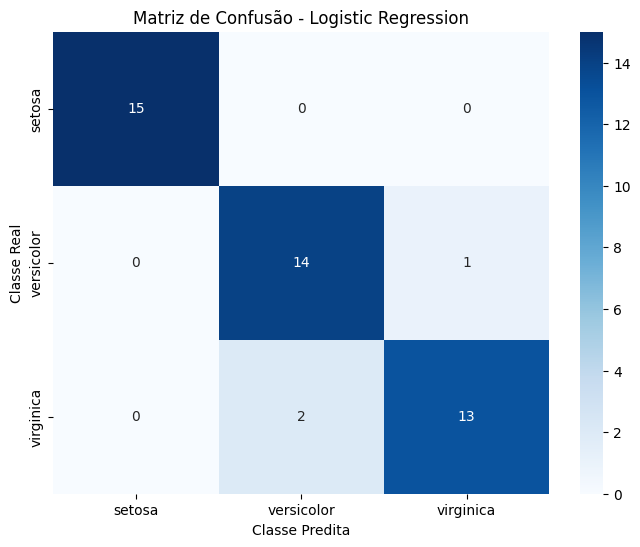

In [18]:
# Visualizar Matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title(f"Matriz de Confusão - {nome_algoritmo}")
plt.xlabel("Classe Predita")
plt.ylabel('Classe Real')
plt.show()

In [19]:
# Comparar Métricas e Resultados
tabela_comparacao = []
for nome_algoritmo, resultados in resultados_modelos.items():
  tabela_comparacao.append([nome_algoritmo, resultados['acuracia']])

df_comparacao = pd.DataFrame(tabela_comparacao, columns=['Algoritmo', 'Acurácia'])
df_comparacao = df_comparacao.sort_values(by='Acurácia', ascending=False).reset_index(drop=True)
df_comparacao

,Algoritmo,Acurácia
0,KNN,0.977778
1,Decision Tree,0.933333
2,Logistic Regression,0.933333


In [20]:
melhor_algoritmo = df_comparacao.loc[0, "Algoritmo"]
melhor_acuracia = df_comparacao.loc[0,'Acurácia']
print(f"Melhor algoritmo: {melhor_algoritmo} com Acurácia = {melhor_acuracia:.4f}")

Melhor algoritmo: KNN com Acurácia = 0.9778
